In [950]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
plt.style.use('dark_background')
import warnings
warnings.filterwarnings("ignore")

# ETL
El primer paso fue extraer las tablas de la página https://indicadores.enacom.gob.ar/datos-abiertos.

     Luego se abre el archivo .xlsx y se van transformando a .csv cada pestaña útil del archivo.
     No se convirtieron todas las tablas, porque varias tenían datos redundantes entre sí, a continuación se detalla cuáles de las 15 tablas se conservan y cuáles no:

* **Acc_vel_loc_sinrango** se guarda por tener las localidades de forma más detallada.

* **Velocidad_sin_rango** tiene la misma información que Acceso por velocidad pero menos organizado así que solo guarda el segundo.

* **Velocidad % por prov** también se guarda.

* **Totales VDM** no se utiliza por tener la misma información que las tablas anteriores pero menos detallada.

* **Accesos_tecnologias_localidad** se guarda.

* **Total Acceso Por Tecnologia** tiene los mismos datos que **Acceso Por Tecnologia** pero en este último están más desglosados así que se guarda solo este.

* **Dial-BAf** tiene los mismos datos que Totales Dial-BAf pero más desglosados así que se conserva solo el primero.

* Juntando **Penetracion-hogares** y **Penetracion-población** se consigue información más detallada que **Penetracion-totales**, por lo que se descarta esta última.

* **Totales accesos velocidad** tiene la misma información que las primeras tablas así que se descarta.

* Y la tabla **Ingresos** se guarda por tener información importante para el negocio.

      Finalmente con python se abren correctamente las tablas creando los data frames y se ponen a punto según el tipo de dato.

## Carga
### Acc_vel_loc_sinrango = veloc_loc

In [951]:
veloc_loc= pd.read_csv('internet\Internet.xlsx - Acc_vel_loc_sinrangos.csv', delimiter=',')

In [952]:
veloc_loc.head()

,Partido,Localidad,link Indec,Velocidad (Mbps),Provincia,Accesos
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.00,1
1,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.50,2
2,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.75,19
3,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,3.00,85
4,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,3.50,145


In [953]:
veloc_loc.rename(columns={'Partido': 'Provincia',
                          'Localidad': 'Partido',
                          'link Indec': 'Localidad',
                          'Provincia': 'Link Indec'} , inplace=True)



In [954]:
veloc_loc.head()

,Provincia,Partido,Localidad,Velocidad (Mbps),Link Indec,Accesos
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.00,1
1,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.50,2
2,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.75,19
3,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,3.00,85
4,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,3.50,145


In [955]:
veloc_loc.dtypes

Provincia            object
Partido              object
Localidad            object
Velocidad (Mbps)     object
Link Indec          float64
Accesos              object
dtype: object

In [956]:
print(veloc_loc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18864 entries, 0 to 18863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Provincia         18864 non-null  object 
 1   Partido           18864 non-null  object 
 2   Localidad         18863 non-null  object 
 3   Velocidad (Mbps)  18864 non-null  object 
 4   Link Indec        18864 non-null  float64
 5   Accesos           18857 non-null  object 
dtypes: float64(1), object(5)
memory usage: 884.4+ KB
None


In [957]:
# Eliminar duplicados
veloc_loc = veloc_loc.drop_duplicates()

In [958]:
veloc_loc.fillna(0, inplace=True)

In [959]:
veloc_loc['Velocidad (Mbps)'] = veloc_loc['Velocidad (Mbps)'].str.strip('Sin Datos').str.strip("'").replace('', np.nan).astype(float)
veloc_loc['Accesos']= veloc_loc['Accesos'].str.replace(',', '', regex=False ).astype(float)

In [960]:
veloc_loc.dtypes

Provincia            object
Partido              object
Localidad            object
Velocidad (Mbps)    float64
Link Indec          float64
Accesos             float64
dtype: object

In [961]:
# Guardar el dataset procesado
veloc_loc.to_csv('Acc_vel_loc_sinrango_procesado.csv', index=False)


## Carga 
### Accesos Por Tecnologias = Accesos_tec

In [962]:
Accesos_tec= pd.read_csv('internet\Internet.xlsx - Accesos Por Tecnología.csv', delimiter=',')

In [963]:
Accesos_tec.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,2,Buenos Aires,"214,055","2,722,466","1,849,476","138,638","64,745","4,989,380"
1,2024,2,Capital Federal,"54,102","1,144,781","230,402","4,493","29,821","1,463,599"
2,2024,2,Catamarca,"4,951","10,303","58,355","1,384",81,"75,074"
3,2024,2,Chaco,"9,448","57,935","68,944","8,407","2,358","147,092"
4,2024,2,Chubut,"25,955","80,704","26,516","31,118","9,930","174,223"


In [964]:
Accesos_tec.tail()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
1004,2014,1,Santiago Del Estero,"32,567","3,598",19,915,34,"37,133"
1005,2014,1,Tierra Del Fuego,"21,618","2,837",648,1,"2,934","28,038"
1006,2014,1,Tucumán,"129,717",83,121,13,98,"130,032"
1007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,*,Los datos provinciales no coinciden a nivel na...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [965]:
print(Accesos_tec.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           1008 non-null   object
 1   Trimestre     1008 non-null   object
 2   Provincia     1007 non-null   object
 3   ADSL          1007 non-null   object
 4   Cablemodem    1007 non-null   object
 5   Fibra óptica  1007 non-null   object
 6   Wireless      1007 non-null   object
 7   Otros         1007 non-null   object
 8   Total         1007 non-null   object
dtypes: object(9)
memory usage: 71.1+ KB
None


In [966]:
Accesos_tec['Wireless'] = Accesos_tec['Wireless'].str.replace(',', '.').astype(float)
Accesos_tec['Cablemodem'] = Accesos_tec['Cablemodem'].str.replace(',', '').astype(float)
Accesos_tec['Fibra óptica'] = Accesos_tec['Fibra óptica'].str.replace(',', '').astype(float)
Accesos_tec['Otros'] = Accesos_tec['Otros'].str.replace(',', '').astype(float)
Accesos_tec['ADSL'] = Accesos_tec['ADSL'].str.replace(',', '').astype(float)
Accesos_tec['Total'] = Accesos_tec['Total'].str.replace(',', '').astype(float)


In [967]:
Accesos_tec.fillna(0, inplace=True)

In [968]:
Accesos_tec['Año'] = Accesos_tec['Año'].str.strip('*').str.strip("'")
Accesos_tec['Año'] = Accesos_tec['Año'].str.strip(' ').str.strip("'")
Accesos_tec['Año'] = pd.to_datetime(Accesos_tec['Año'], format='%Y', errors='coerce')

In [969]:
Accesos_tec= Accesos_tec.drop([1007, 1008])

In [970]:
Accesos_tec['Trimestre'] = Accesos_tec['Trimestre'].str.strip('*').str.strip("'")
Accesos_tec['Trimestre'] = Accesos_tec['Trimestre'].fillna(0).astype(int)

In [971]:
print(Accesos_tec.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Año           1007 non-null   datetime64[ns]
 1   Trimestre     1007 non-null   int32         
 2   Provincia     1007 non-null   object        
 3   ADSL          1007 non-null   float64       
 4   Cablemodem    1007 non-null   float64       
 5   Fibra óptica  1007 non-null   float64       
 6   Wireless      1007 non-null   float64       
 7   Otros         1007 non-null   float64       
 8   Total         1007 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int32(1), object(1)
memory usage: 67.0+ KB
None


In [972]:
# Guardar el dataset procesado
Accesos_tec.to_csv('Accesos Por Tecnología_procesado.csv', index=False)

## Carga
### Dial-BAf = Dial_BAf

In [973]:
Dial_BAf= pd.read_csv('internet\Internet.xlsx - Dial-BAf.csv', delimiter=',')

In [974]:
Dial_BAf.head()

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2024,2,Buenos Aires,"4,983,480","5,900","4,989,380"
1,2024,2,Capital Federal,"1,461,549","2,050","1,463,599"
2,2024,2,Catamarca,"75,073",1,"75,074"
3,2024,2,Chaco,"147,087",5,"147,092"
4,2024,2,Chubut,"173,366",857,"174,223"


In [975]:
Dial_BAf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               1992 non-null   int64 
 1   Trimestre         1992 non-null   int64 
 2   Provincia         1992 non-null   object
 3   Banda ancha fija  1992 non-null   object
 4   Dial up           1988 non-null   object
 5   Total             1992 non-null   object
dtypes: int64(2), object(4)
memory usage: 93.5+ KB


In [976]:
Dial_BAf['Banda ancha fija'] = Dial_BAf['Banda ancha fija'].str.replace(',', '', regex=False ).astype(float)
Dial_BAf['Dial up'] = Dial_BAf['Dial up'].str.replace(',', '', regex=False ).astype(float)
Dial_BAf['Total'] = Dial_BAf['Total'].str.replace(',', '', regex=False ).astype(float)

In [977]:
Dial_BAf['Año'] = pd.to_datetime(Dial_BAf['Año'], format='%Y', errors='coerce')

In [978]:
Dial_BAf.fillna(0, inplace=True)

In [979]:
Dial_BAf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Año               1992 non-null   datetime64[ns]
 1   Trimestre         1992 non-null   int64         
 2   Provincia         1992 non-null   object        
 3   Banda ancha fija  1992 non-null   float64       
 4   Dial up           1992 non-null   float64       
 5   Total             1992 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 93.5+ KB


In [980]:
# Guardar el dataset procesado
Dial_BAf.to_csv('Dial-BAf_procesado.csv', index=False)

## Cargar
### Ingresos.csv = Ingresos

In [981]:
ingresos = pd.read_csv('internet\Internet.xlsx - Ingresos .csv', delimiter=',')

In [982]:
ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,2,"442,032,166.69",Abr-Jun 2024
1,2024,1,"346,198,986.13",Ene-Mar 2024
2,2023,4,"167,376,014.80",Oct-Dic 2023
3,2023,3,"133,106,593.41",Jul-Sept 2023
4,2023,2,"118,060,280.28",Jun-Mar 2023


In [983]:
ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Año                        42 non-null     int64 
 1    Trimestre                 42 non-null     int64 
 2   Ingresos (miles de pesos)  42 non-null     object
 3    Periodo                   42 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.4+ KB


In [984]:
ingresos['Año']=pd.to_datetime(ingresos['Año'], format='%Y', errors='coerce')
ingresos['Ingresos (miles de pesos)']=ingresos['Ingresos (miles de pesos)'].str.replace(',', '', regex=False ).astype(float)

In [985]:
ingresos.fillna(0, inplace=True)

In [986]:
ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Año                        42 non-null     datetime64[ns]
 1    Trimestre                 42 non-null     int64         
 2   Ingresos (miles de pesos)  42 non-null     float64       
 3    Periodo                   42 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.4+ KB


In [987]:
ingresos.to_csv('Ingresos_Procesado.csv', index=False)

## Carga
### Penetracion-hogares = P_hogares

In [988]:
P_hogares=pd.read_csv('internet\Internet.xlsx - Penetracion-hogares.csv', delimiter=',')

In [989]:
P_hogares.rename(columns={' Trimestre ' : 'Trimestre',
                          ' Provincia ': 'Provincia'}, inplace=True)

In [990]:
P_hogares.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,2,Buenos Aires,79.84
1,2024,2,Capital Federal,116.37
2,2024,2,Catamarca,68.81
3,2024,2,Chaco,44.06
4,2024,2,Chubut,86.33


In [991]:
P_hogares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           1000 non-null   int64  
 1   Trimestre                     1000 non-null   int64  
 2   Provincia                     1000 non-null   object 
 3   Accesos por cada 100 hogares  1000 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB


In [992]:
P_hogares['Año']= pd.to_datetime(P_hogares['Año'], format='%Y', errors='coerce')

In [993]:
P_hogares.fillna(0, inplace=True)

In [994]:
P_hogares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Año                           1000 non-null   datetime64[ns]
 1   Trimestre                     1000 non-null   int64         
 2   Provincia                     1000 non-null   object        
 3   Accesos por cada 100 hogares  1000 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 31.4+ KB


In [995]:
P_hogares.to_csv('Penetracion-hogares_procesado.csv', index=False)

## carga
### Penetracion-poblacion = p_poblacion

In [996]:
p_poblacion = pd.read_csv('internet\Internet.xlsx - Penetración-poblacion.csv', delimiter=',')

In [997]:
p_poblacion.rename(columns={' Trimestre ':'Trimestre',
                                  ' Provincia ': 'Provincia'}, inplace=True)

In [998]:
p_poblacion.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2024,2,Buenos Aires,27.43
1,2024,2,Capital Federal,47.44
2,2024,2,Catamarca,17.50
3,2024,2,Chaco,11.78
4,2024,2,Chubut,26.46


In [999]:
p_poblacion.fillna(0, inplace=True)

In [1000]:
p_poblacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       1000 non-null   int64  
 1   Trimestre                 1000 non-null   int64  
 2   Provincia                 1000 non-null   object 
 3   Accesos por cada 100 hab  1000 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB


In [1001]:
p_poblacion['Año']=pd.to_datetime(p_poblacion['Año'], format='%Y', errors='coerce')

In [1002]:
p_poblacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Año                       1000 non-null   datetime64[ns]
 1   Trimestre                 1000 non-null   int64         
 2   Provincia                 1000 non-null   object        
 3   Accesos por cada 100 hab  1000 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 31.4+ KB


In [1003]:
p_poblacion.to_csv('Penetracion-poblacion_procesado.csv', index=False)

## Carga
### Totales VMD = tot_vmd

In [1004]:
tot_vmd=pd.read_csv('internet\Internet.xlsx - Totales VMD.csv', delimiter=',')

In [1005]:
tot_vmd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     42 non-null     int64  
 1   Trimestre               42 non-null     int64  
 2   Mbps (Media de bajada)  42 non-null     float64
 3   Trimestre.1             42 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


In [1006]:
tot_vmd['Año']=pd.to_datetime(tot_vmd['Año'], format='%Y', errors='coerce')
tot_vmd.rename(columns={'Trimestre.1': 'Periodo'}, inplace=True)

In [1007]:
tot_vmd.fillna(0, inplace=True)

In [1008]:
tot_vmd.head()

,Año,Trimestre,Mbps (Media de bajada),Periodo
0,2024-01-01,2,139.25,Abr-Jun 2024
1,2024-01-01,1,139.15,Ene-Mar 2024
2,2023-01-01,4,139.04,Oct-Dic 2023
3,2023-01-01,3,129.67,Jul-Sept 2023
4,2023-01-01,2,123.95,Abr-Jun 2023


In [1009]:
tot_vmd.to_csv('Totrales VMD_procesado.csv', index=False)

## Carga
### Velocidad % por prov = vel_prov

In [1010]:
vel_prov=pd.read_csv('internet\Internet.xlsx - Velocidad % por prov.csv', delimiter=',')

In [1011]:
vel_prov.fillna(0, inplace=True)

In [1012]:
vel_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     1008 non-null   int64  
 1   Trimestre               1008 non-null   int64  
 2   Provincia               1008 non-null   object 
 3   Mbps (Media de bajada)  1008 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.6+ KB


In [1013]:
vel_prov['Año']=pd.to_datetime(vel_prov['Año'], format='%Y', errors='coerce')

In [1014]:
vel_prov.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2024-01-01,2,Buenos Aires,157.41
1,2024-01-01,2,Capital Federal,233.01
2,2024-01-01,2,Catamarca,97.38
3,2024-01-01,2,Chaco,107.76
4,2024-01-01,2,Chubut,21.67


In [1015]:
vel_prov.to_csv('Velocidad % por prov_procesado.csv', index=False)

## Carga
### Velocidad_sin_rangos = Vel_sin_rangos

In [1016]:
Vel_sin_rangos=pd.read_csv('internet\Internet.xlsx - Velocidad_sin_Rangos.csv', delimiter=',')

In [1017]:
Vel_sin_rangos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18884 entries, 0 to 18883
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Año          18884 non-null  int64 
 1   Trimestre    18884 non-null  int64 
 2   Provincia    18884 non-null  object
 3    Velocidad   18874 non-null  object
 4   Accesos      18884 non-null  object
dtypes: int64(2), object(3)
memory usage: 737.8+ KB


In [1018]:
Vel_sin_rangos.fillna(0, inplace=True)

In [1019]:
Vel_sin_rangos['Año']=pd.to_datetime(Vel_sin_rangos['Año'], format='%Y', errors='coerce')
Vel_sin_rangos[' Velocidad '] = Vel_sin_rangos[' Velocidad '].str.replace(',', '', regex=False ).str.strip(' - ').str.strip("'").replace('', np.nan).astype(float)
Vel_sin_rangos['Accesos']=Vel_sin_rangos['Accesos'].str.replace(',', '', regex=False ).astype(float)

In [1020]:
Vel_sin_rangos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18884 entries, 0 to 18883
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Año          18884 non-null  datetime64[ns]
 1   Trimestre    18884 non-null  int64         
 2   Provincia    18884 non-null  object        
 3    Velocidad   18858 non-null  float64       
 4   Accesos      18884 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 737.8+ KB


In [1021]:
Vel_sin_rangos.head()

,Año,Trimestre,Provincia,Velocidad,Accesos
0,2024-01-01,2,BUENOS AIRES,75.0,1062.0
1,2024-01-01,2,BUENOS AIRES,59.0,59.0
2,2024-01-01,2,BUENOS AIRES,480.0,5.0
3,2024-01-01,2,BUENOS AIRES,4.0,41735.0
4,2024-01-01,2,BUENOS AIRES,18.0,1042.0


In [1022]:
Vel_sin_rangos.to_csv('Velocidad_sin_Rangos_procesado.csv', index=False)

##### Modificacion
##### Año | Trimestre | Provincia = APT

Unir en una sola tabla las las columnas de las tablas Año, Trimestre y Provincia
* Velociad % por prov
* velocidad_sin_rangos
* Accesos por tecnologia
* Penetracion-hogares
* Penetracion-poblacion

In [1023]:
result = pd.merge(vel_prov, Vel_sin_rangos, on=['Año', 'Trimestre', 'Provincia'], how='outer')

In [1024]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19268 entries, 0 to 19267
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Año                     19268 non-null  datetime64[ns]
 1   Trimestre               19268 non-null  int64         
 2   Provincia               19268 non-null  object        
 3   Mbps (Media de bajada)  18394 non-null  float64       
 4    Velocidad              18858 non-null  float64       
 5   Accesos                 18884 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 903.3+ KB


In [1025]:
print(P_hogares.columns)
print(result.columns)

Index(['Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hogares'], dtype='object')
Index(['Año', 'Trimestre', 'Provincia', 'Mbps (Media de bajada)',
       ' Velocidad ', 'Accesos'],
      dtype='object')


In [1026]:
result2 = pd.merge(P_hogares, result,  on=['Año', 'Trimestre', 'Provincia'], how='outer')

In [1027]:
result2.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Mbps (Media de bajada),Velocidad,Accesos
0,2014-01-01,1,Buenos Aires,54.57,NaN,NaN,NaN
1,2014-01-01,1,Capital Federal,112.25,NaN,NaN,NaN
2,2014-01-01,1,Catamarca,24.25,NaN,NaN,NaN
3,2014-01-01,1,Chaco,20.72,NaN,NaN,NaN
4,2014-01-01,1,Chubut,41.24,NaN,NaN,NaN


In [1028]:
print(p_poblacion.columns)
print(result2.columns)

Index(['Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hab'], dtype='object')
Index(['Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hogares',
       'Mbps (Media de bajada)', ' Velocidad ', 'Accesos'],
      dtype='object')


In [1029]:
result3 = pd.merge(p_poblacion, result2, on=['Año', 'Trimestre', 'Provincia'], how='outer')
result3.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hab,Accesos por cada 100 hogares,Mbps (Media de bajada),Velocidad,Accesos
0,2014-01-01,1,Buenos Aires,16.69,54.57,NaN,NaN,NaN
1,2014-01-01,1,Capital Federal,42.66,112.25,NaN,NaN,NaN
2,2014-01-01,1,Catamarca,6.18,24.25,NaN,NaN,NaN
3,2014-01-01,1,Chaco,5.55,20.72,NaN,NaN,NaN
4,2014-01-01,1,Chubut,12.70,41.24,NaN,NaN,NaN


##### Partido| Provincia | Localidad = PPL
unir las tablas de acc_vel_loc y accesos por tecnologia

In [1030]:
PPL=pd.merge(veloc_loc, Accesos_tec, on=['Provincia'], how='outer', indicator=True)
     

In [1031]:
PPL.head()

,Provincia,Partido,Localidad,Velocidad (Mbps),Link Indec,Accesos,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,_merge
0,Buenos Aires,NaN,NaN,NaN,NaN,NaN,2022-01-01,2.0,350652.0,2719613.0,1399043.0,126.847,71028.0,4667183.0,right_only
1,Buenos Aires,NaN,NaN,NaN,NaN,NaN,2021-01-01,3.0,585729.0,2595485.0,885613.0,120.228,64554.0,4251609.0,right_only
2,Buenos Aires,NaN,NaN,NaN,NaN,NaN,2021-01-01,2.0,603255.0,2503830.0,854173.0,113.546,57547.0,4132351.0,right_only
3,Buenos Aires,NaN,NaN,NaN,NaN,NaN,2021-01-01,1.0,629679.0,2452056.0,821597.0,98.806,57864.0,4060002.0,right_only
4,Capital Federal,NaN,NaN,NaN,NaN,NaN,2022-01-01,2.0,145491.0,1232226.0,121506.0,5.757,31791.0,1536771.0,right_only


In [1032]:
PPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19871 entries, 0 to 19870
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Provincia         19871 non-null  object        
 1   Partido           18864 non-null  object        
 2   Localidad         18864 non-null  object        
 3   Velocidad (Mbps)  18726 non-null  float64       
 4   Link Indec        18864 non-null  float64       
 5   Accesos           18857 non-null  float64       
 6   Año               1007 non-null   datetime64[ns]
 7   Trimestre         1007 non-null   float64       
 8   ADSL              1007 non-null   float64       
 9   Cablemodem        1007 non-null   float64       
 10  Fibra óptica      1007 non-null   float64       
 11  Wireless          1007 non-null   float64       
 12  Otros             1007 non-null   float64       
 13  Total             1007 non-null   float64       
 14  _merge            1987

In [1033]:
PPL.describe()

,Velocidad (Mbps),Link Indec,Accesos,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,1.872600e+04,18864.000000,18857.000000,1007,1007.000000,1.007000e+03,1.007000e+03,1.007000e+03,1007.000000,1007.000000,1.007000e+03
mean,3.269266e+07,66.866042,612.828499,2018-10-04 05:50:20.854021632,2.453823,1.129309e+05,1.821583e+05,4.855699e+04,53.901028,6497.041708,3.626854e+05
min,2.000010e+06,0.000000,-5582.000000,2014-01-01 00:00:00,1.000000,2.230000e+03,0.000000e+00,0.000000e+00,0.000000,2.000000,1.255700e+04
25%,6.560010e+06,3.000000,3.000000,2016-01-01 00:00:00,1.000000,1.978950e+04,1.102050e+04,3.540000e+02,4.046500,334.500000,6.241150e+04
50%,1.416107e+07,10.000000,26.000000,2019-01-01 00:00:00,2.000000,4.396700e+04,4.075000e+04,3.015000e+03,11.074000,1920.000000,1.139150e+05
75%,5.809102e+07,30.000000,180.000000,2021-01-01 00:00:00,3.000000,8.722000e+04,7.678350e+04,2.925700e+04,26.989000,7548.000000,1.956520e+05
max,9.401402e+07,1024.000000,576789.000000,2024-01-01 00:00:00,4.000000,1.586343e+06,2.797700e+06,1.849476e+06,952.000000,73415.000000,5.011620e+06
std,2.960939e+07,178.987138,6283.359677,NaN,1.117190,2.362922e+05,4.460058e+05,1.758694e+05,145.584282,11239.855091,7.773137e+05


### EDA
#### APT
##### informacion general

In [1034]:
result3.describe().T

,count,mean,min,25%,50%,75%,max,std
Año,20268,2020-10-23 17:51:32.717584128,2014-01-01 00:00:00,2019-01-01 00:00:00,2021-01-01 00:00:00,2023-01-01 00:00:00,2024-01-01 00:00:00,NaN
Trimestre,20268.0,2.475035,1.0,1.0,2.0,4.0,4.0,1.125043
Accesos por cada 100 hab,1011.0,15.663521,2.72,9.05,13.59,20.285,52.24,9.209696
Accesos por cada 100 hogares,1000.0,52.7951,9.51,33.955,50.135,67.01,124.06,24.13493
Mbps (Media de bajada),18394.0,42.474836,2.57,12.72,27.29,56.32,234.44,41.48787
Velocidad,18858.0,96.254073,0.0,4.0,12.3,50.1,10000.0,379.873295
Accesos,18884.0,14123.280979,0.0,26.0,672.5,6114.0,1346370.0,68563.873818


In [1038]:
result3[result3.duplicated()]

,Año,Trimestre,Provincia,Accesos por cada 100 hab,Accesos por cada 100 hogares,Mbps (Media de bajada),Velocidad,Accesos
19817,2024-01-01,2,LA RIOJA,NaN,NaN,NaN,1.0,9.0


<Axes: >

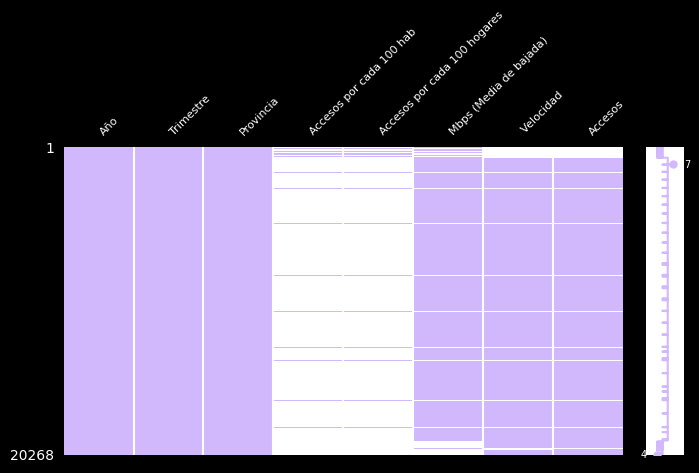

In [1072]:
msno.matrix(result3.sort_values(by=['Año', 'Trimestre']), figsize=(8, 4), color=(0.823, 0.722, 0.992), fontsize=8) # Se orden por fechas para ver cronológicamente que datos faltan


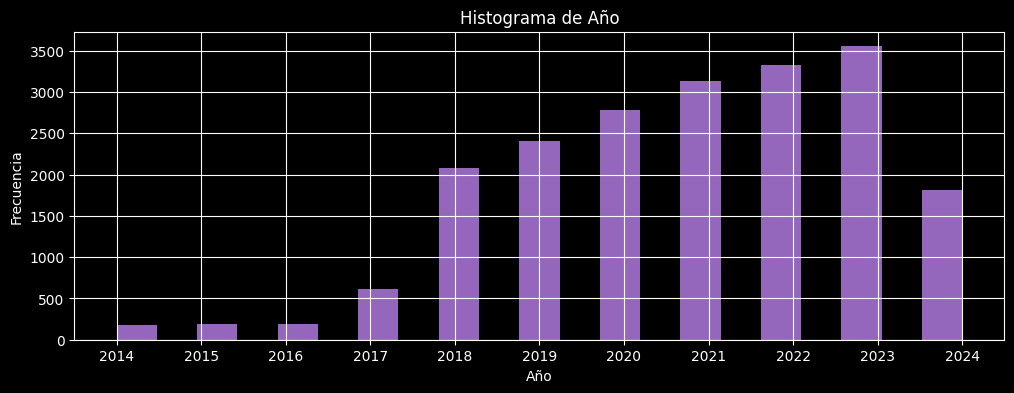

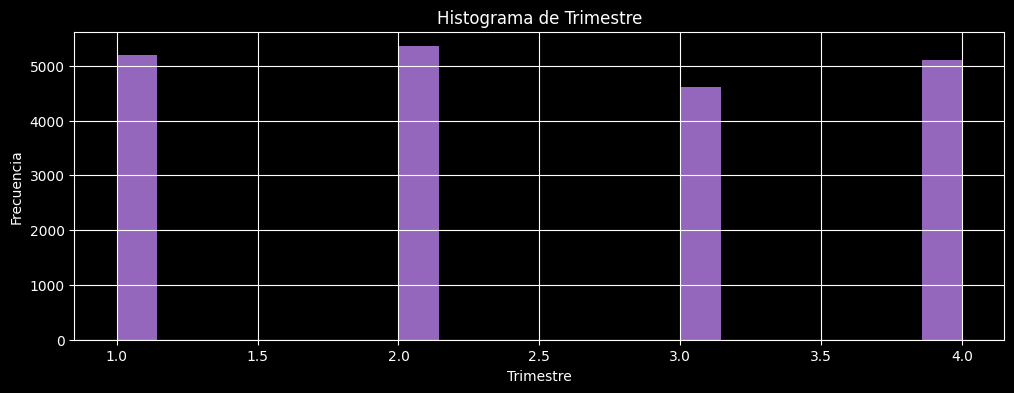

In [1067]:
columnas = ['Año', 'Trimestre']
for i in columnas:
    plt.figure(figsize=(12,4))
    result3[i].hist(bins=21,color='tab:purple')
    plt.xlabel(f'{i}')
    plt.ylabel('Frecuencia')
    plt.title(f'Histograma de {i}')
    plt.show()

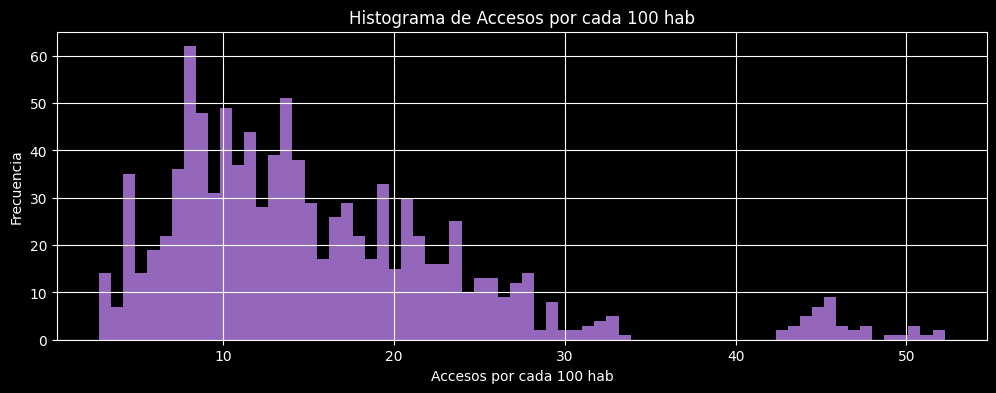

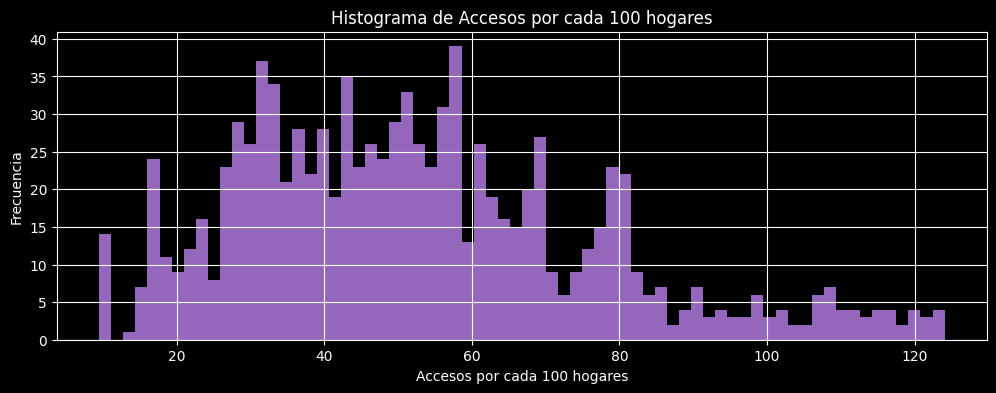

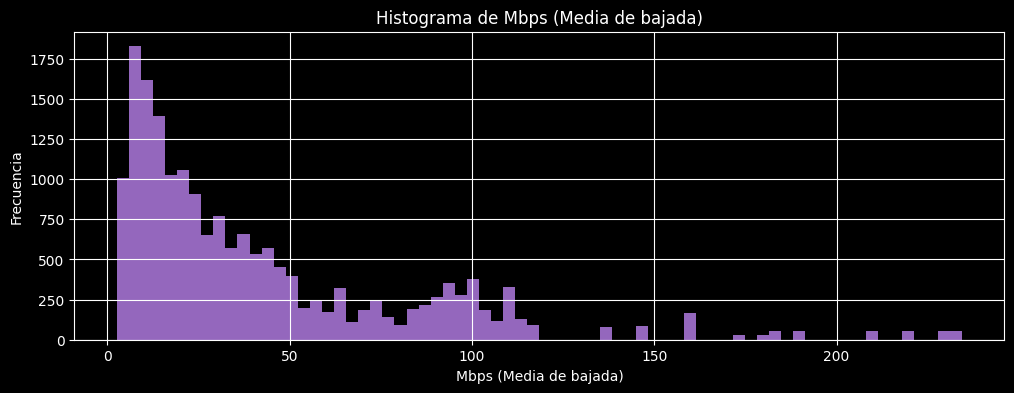

In [1048]:
columnas = ['Accesos por cada 100 hab', 'Accesos por cada 100 hogares', 'Mbps (Media de bajada)']
for i in columnas:
    plt.figure(figsize=(12,4))
    result3[i].hist(bins=70,color='tab:purple')
    plt.xlabel(f'{i}')
    plt.ylabel('Frecuencia')
    plt.title(f'Histograma de {i}')
    plt.show()

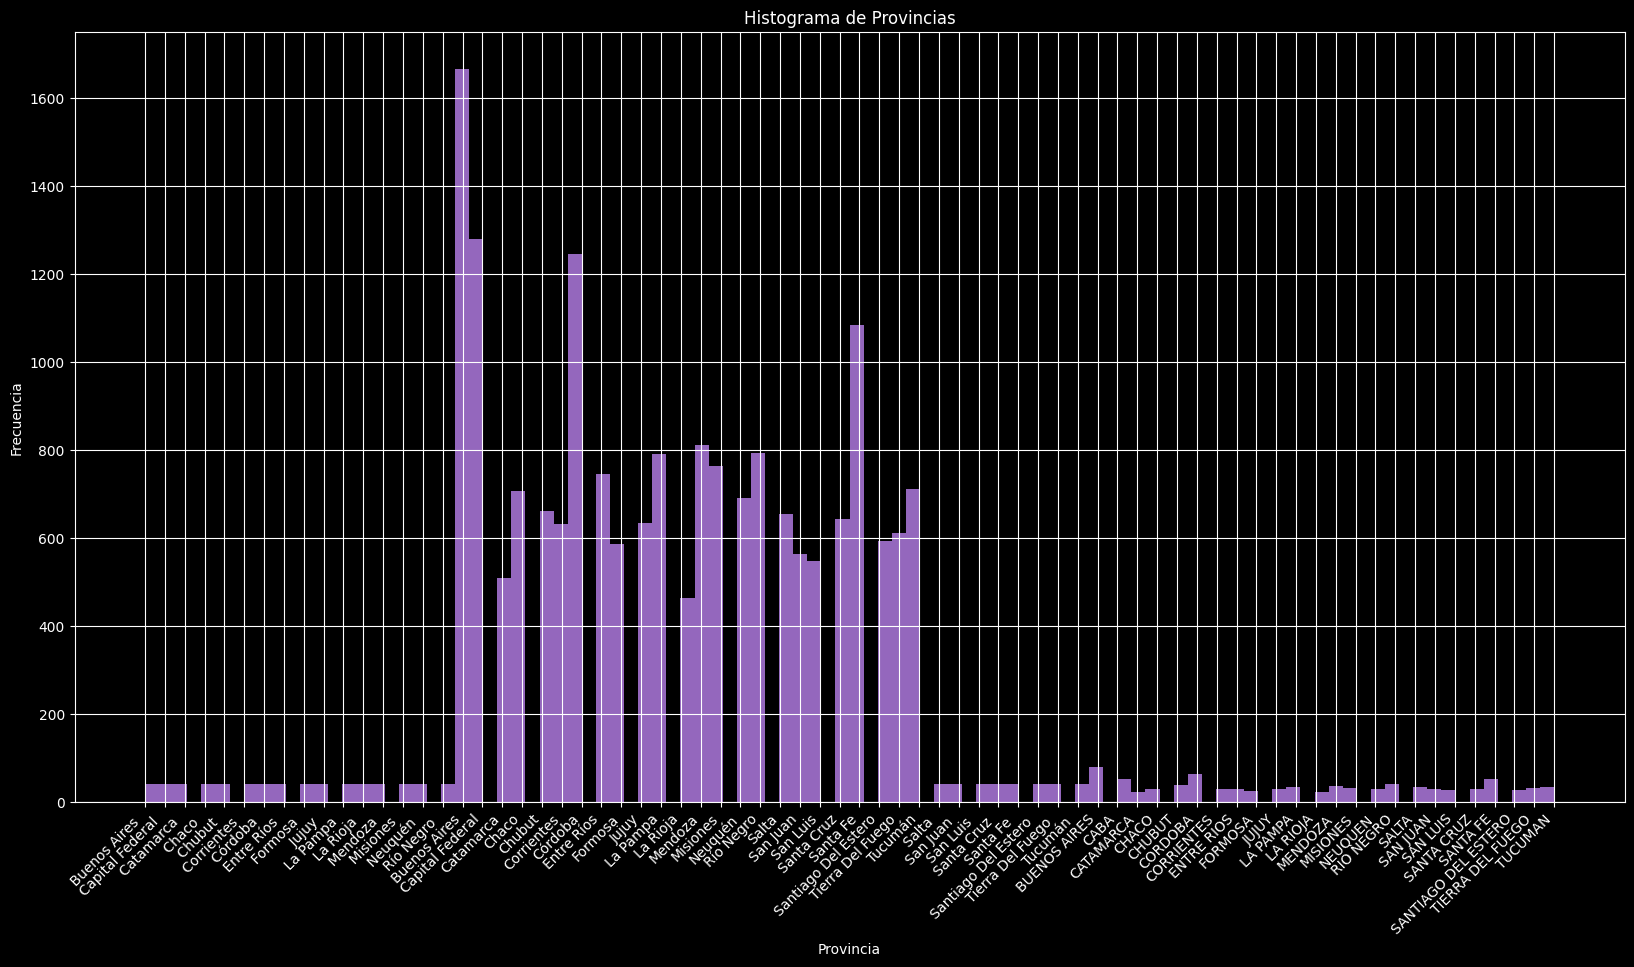

In [1066]:
plt.figure(figsize=(20,10))
result3['Provincia'].hist(bins=100,color='tab:purple')
plt.xlabel('Provincia')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.title(f'Histograma de Provincias')
plt.show()

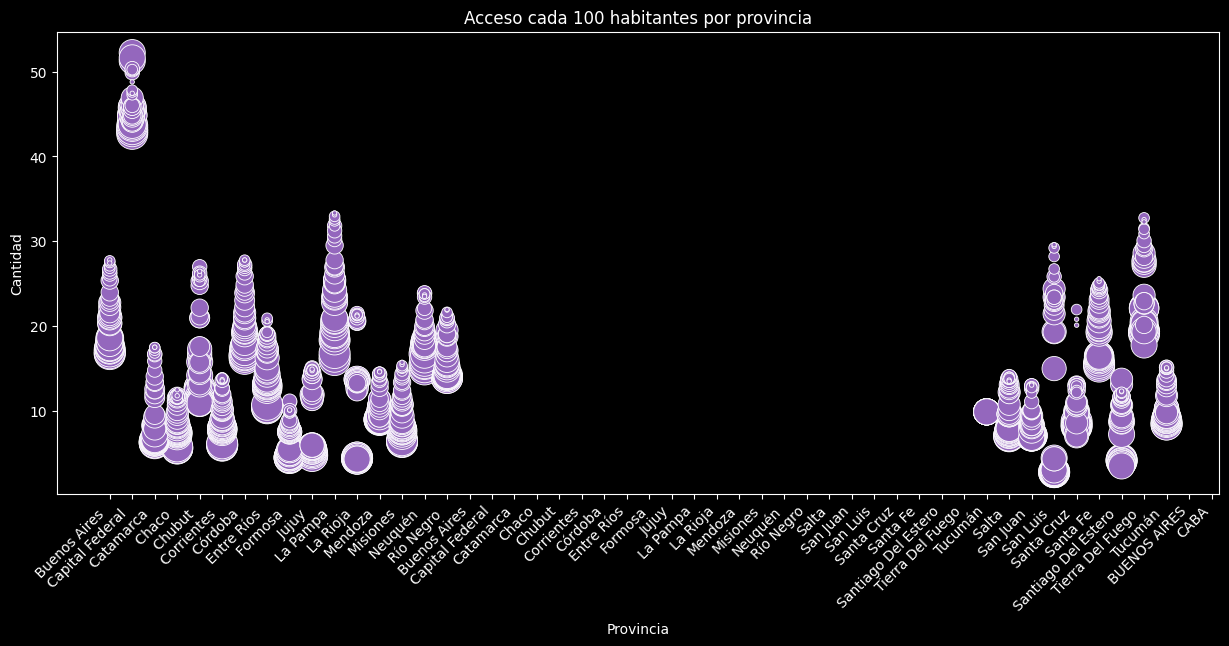

In [1064]:

fig, ax = plt.subplots(figsize=(15, 6))
sns.scatterplot(data=result3, x='Provincia', y='Accesos por cada 100 hab', size='Año', legend=False, sizes=(10, 500), color='tab:purple')
ax.set_xlabel('Provincia')
ax.set_ylabel('Cantidad')
ax.set_title('Acceso cada 100 habitantes por provincia')
plt.xticks(rotation=45, ha='right')
plt.show()

PPL
informcion general

In [1068]:
PPL.describe().T

,count,mean,min,25%,50%,75%,max,std
Velocidad (Mbps),18726.0,32692662.202499,2000010.0,6560010.0,14161070.0,58091020.0,94014020.0,29609388.408127
Link Indec,18864.0,66.866042,0.0,3.0,10.0,30.0,1024.0,178.987138
Accesos,18857.0,612.828499,-5582.0,3.0,26.0,180.0,576789.0,6283.359677
Año,1007,2018-10-04 05:50:20.854021632,2014-01-01 00:00:00,2016-01-01 00:00:00,2019-01-01 00:00:00,2021-01-01 00:00:00,2024-01-01 00:00:00,NaN
Trimestre,1007.0,2.453823,1.0,1.0,2.0,3.0,4.0,1.11719
ADSL,1007.0,112930.860973,2230.0,19789.5,43967.0,87220.0,1586343.0,236292.179471
Cablemodem,1007.0,182158.281033,0.0,11020.5,40750.0,76783.5,2797700.0,446005.777989
Fibra óptica,1007.0,48556.986097,0.0,354.0,3015.0,29257.0,1849476.0,175869.37569
Wireless,1007.0,53.901028,0.0,4.0465,11.074,26.989,952.0,145.584282
Otros,1007.0,6497.041708,2.0,334.5,1920.0,7548.0,73415.0,11239.855091


<Axes: >

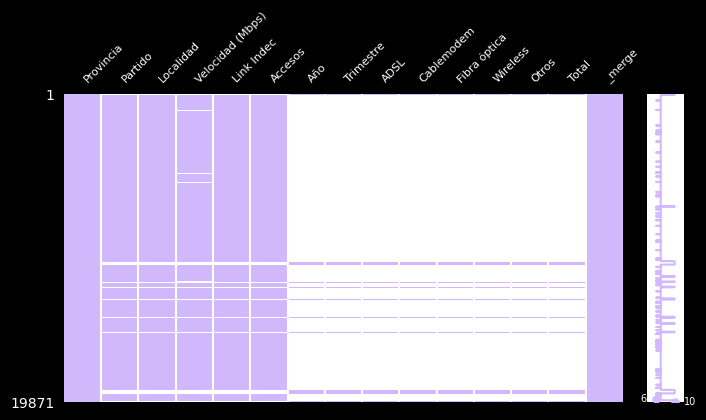

In [1069]:
msno.matrix(PPL, figsize=(8, 4), color=(0.823, 0.722, 0.992), fontsize=8)

<Axes: >

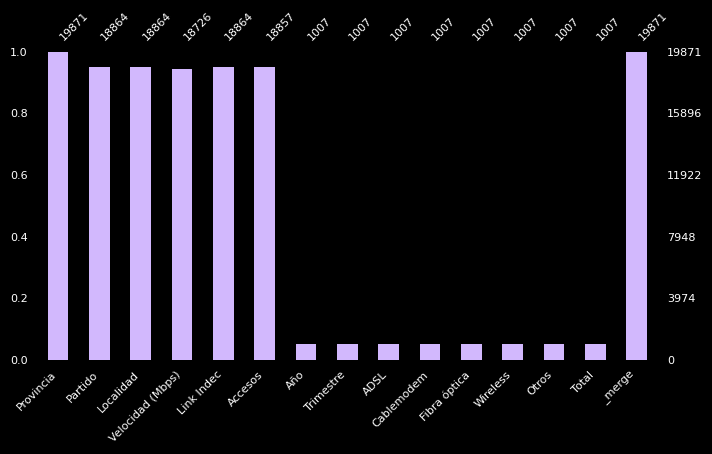

In [1073]:
msno.bar(PPL, figsize=(8, 4), color=(0.823, 0.722, 0.992), fontsize=8)


In [1075]:
PPL[PPL.duplicated()]

,Provincia,Partido,Localidad,Velocidad (Mbps),Link Indec,Accesos,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,_merge


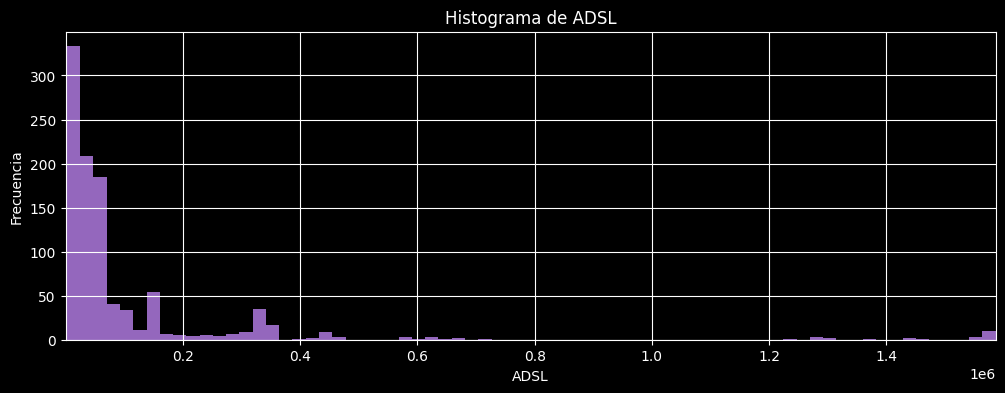

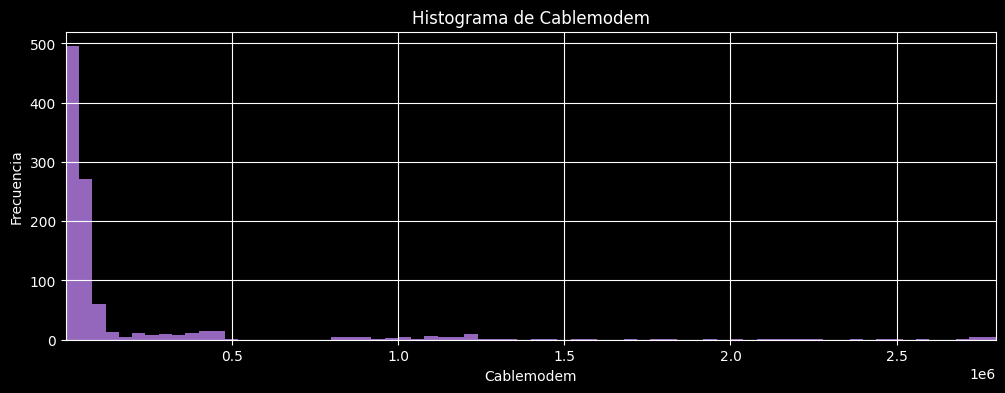

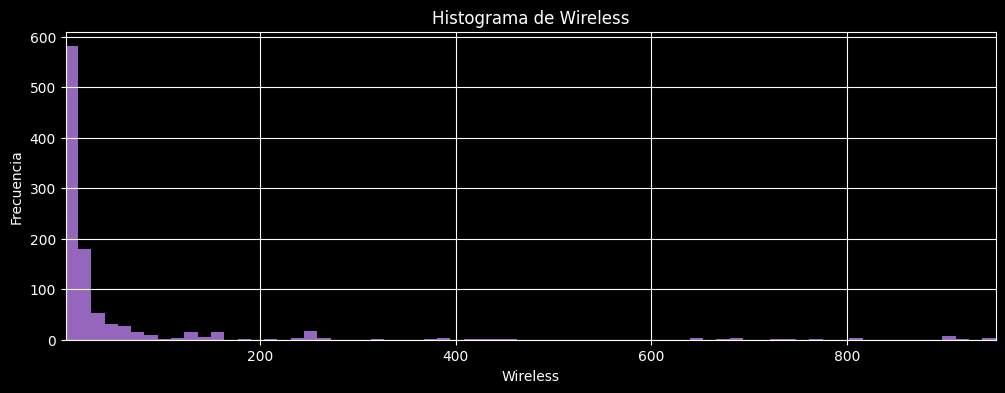

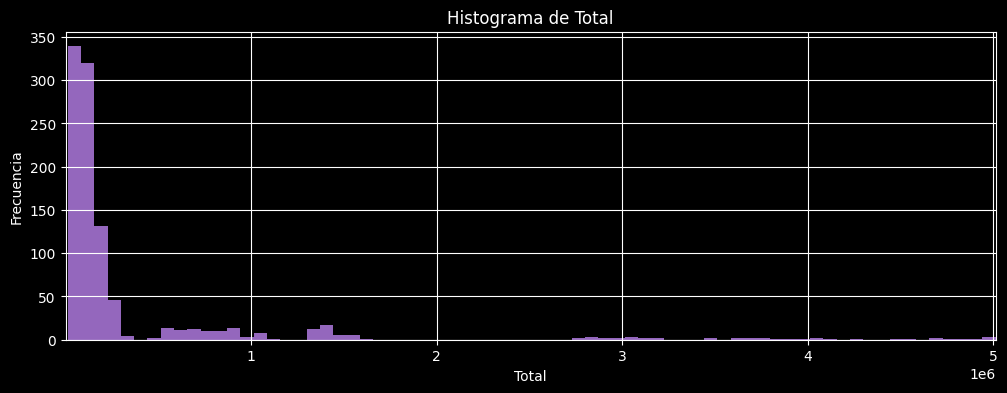

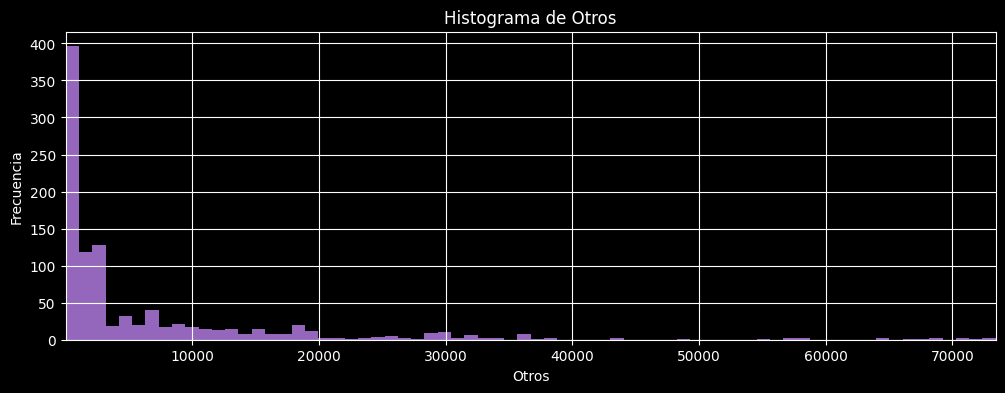

In [1078]:
columnas = ['ADSL', 'Cablemodem', 'Wireless', 'Total', 'Otros']

for i in columnas:
    plt.figure(figsize=(12,4))
    PPL[i].hist(bins=70,color='tab:purple')
    plt.xlim(1, PPL[i].max())
    plt.xlabel(f'{i}')
    plt.ylabel('Frecuencia')
    plt.title(f'Histograma de {i}')
    plt.show()
     

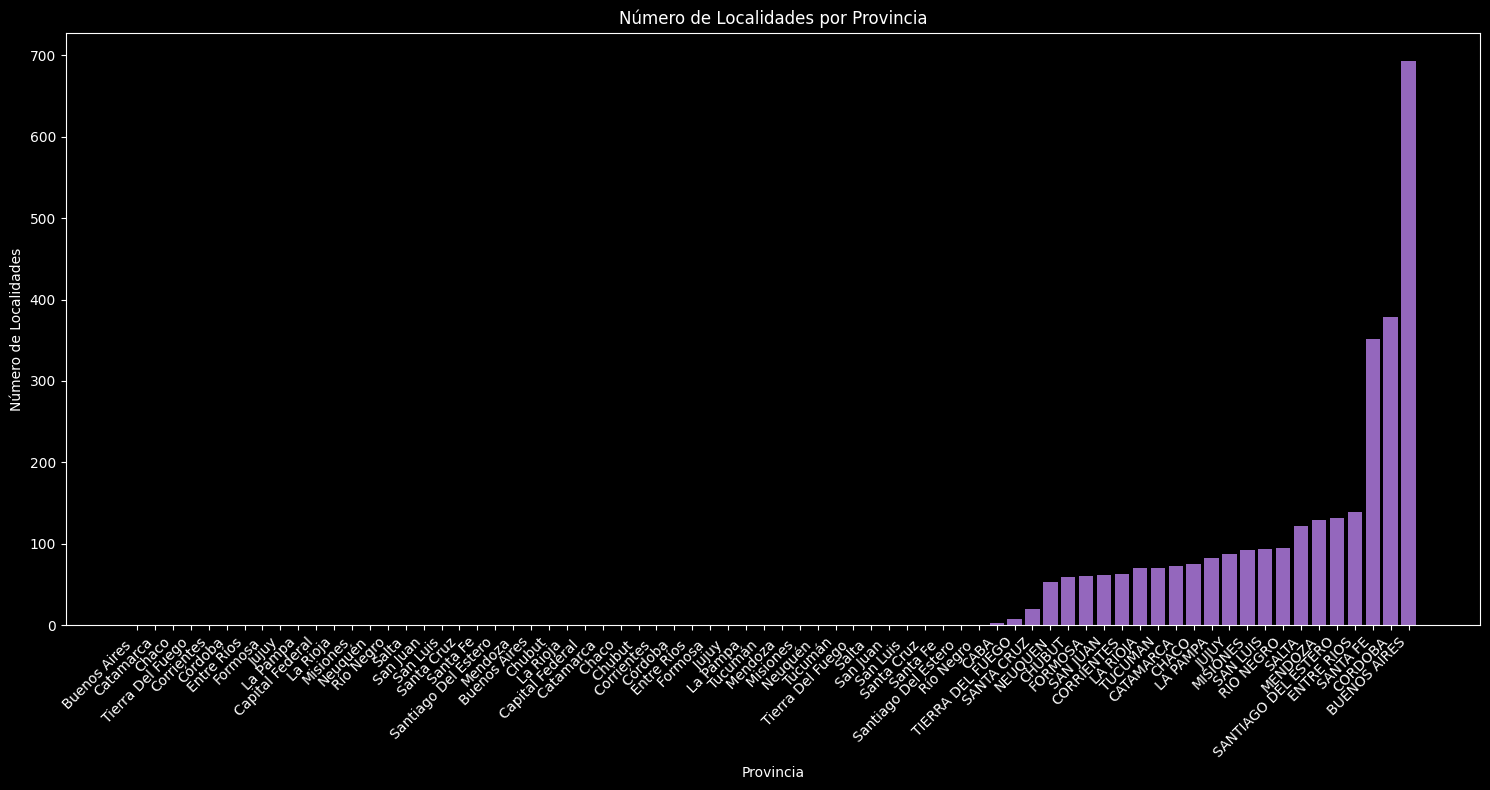

In [1082]:
localidades_por_provincia = PPL.groupby('Provincia')['Localidad'].nunique().reset_index()
localidades_por_provincia.columns = ['Provincia', 'Numero de Localidades']
localidades_por_provincia = localidades_por_provincia.sort_values(by='Numero de Localidades')
plt.figure(figsize=(15, 8))
plt.bar(localidades_por_provincia['Provincia'], localidades_por_provincia['Numero de Localidades'], color='tab:purple')
plt.xlabel('Provincia')
plt.ylabel('Número de Localidades')
plt.title('Número de Localidades por Provincia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

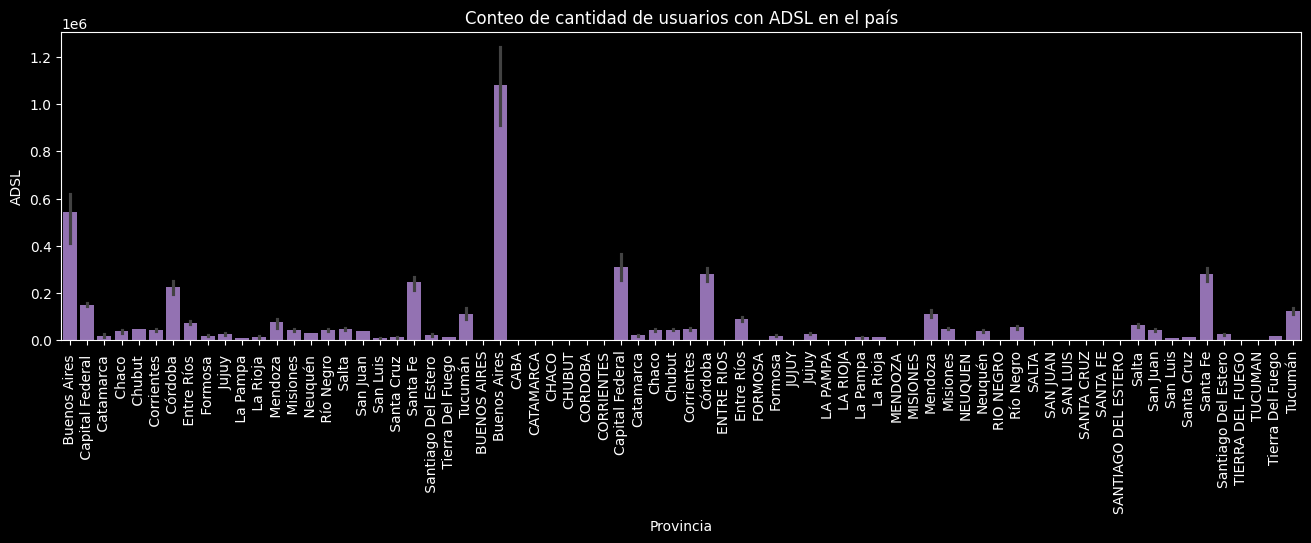

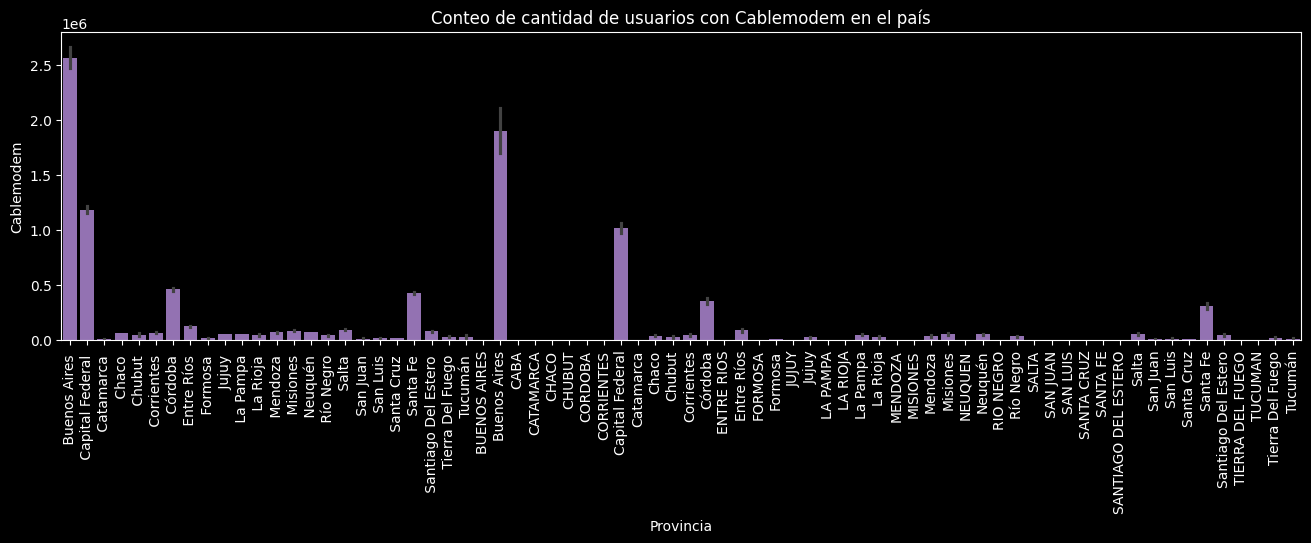

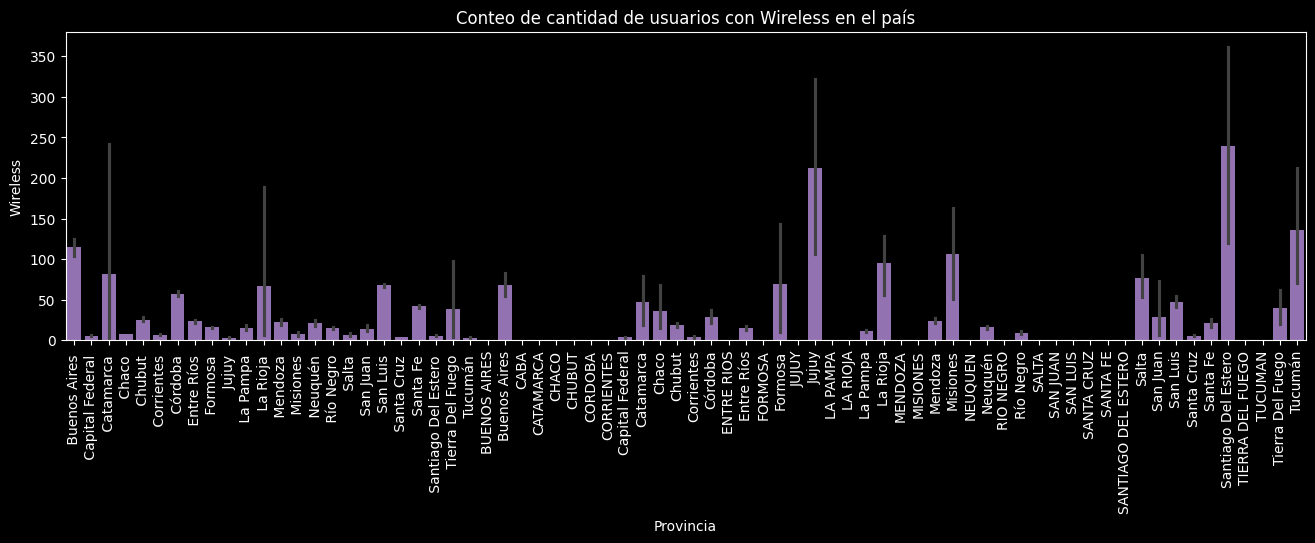

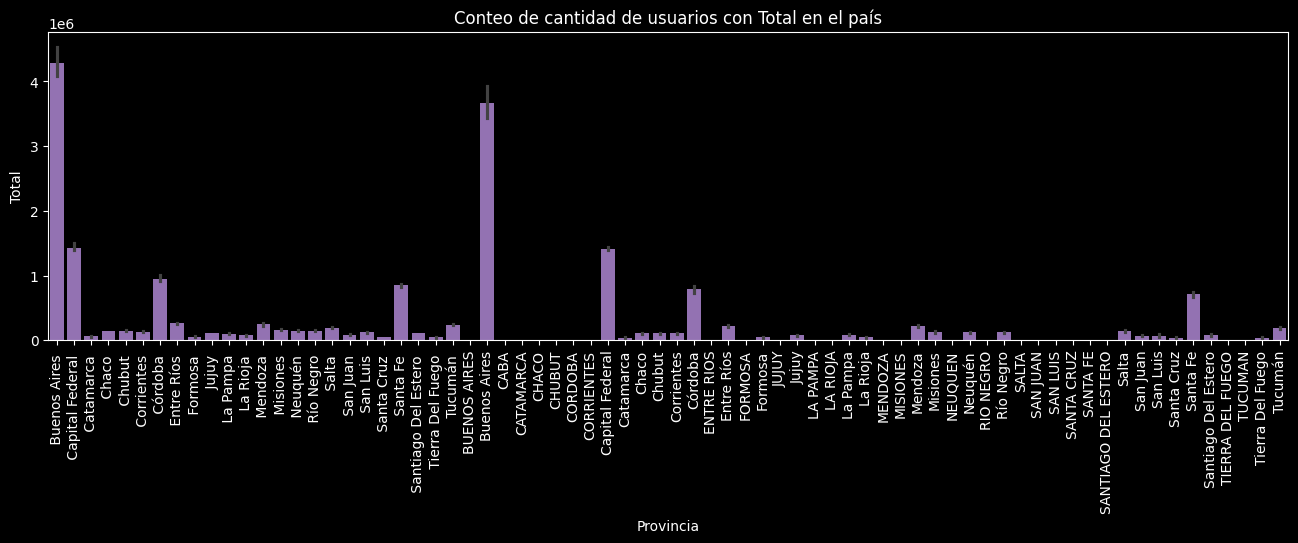

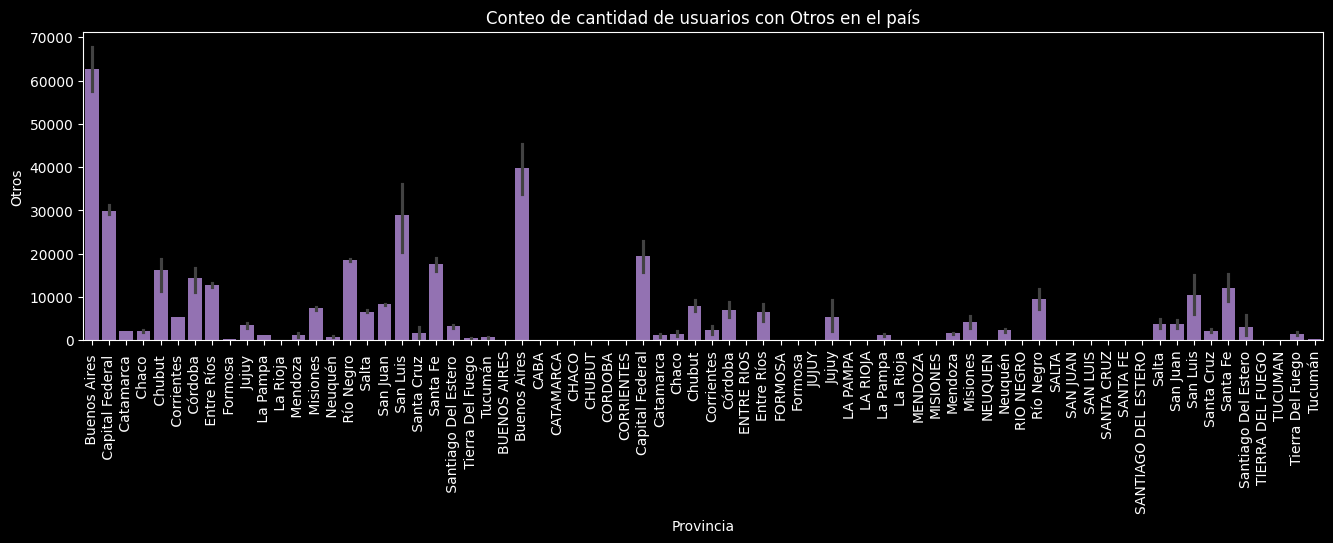

In [1085]:
columnas = ['ADSL', 'Cablemodem', 'Wireless', 'Total', 'Otros']
for i in columnas:
    plt.figure(figsize=(16, 4))
    sns.barplot(x='Provincia', y= i, data=PPL[PPL['Provincia'] != 'Caba'], color='tab:purple')
    plt.ylabel(f'{i}')
    plt.xlabel('Provincia')
    plt.xticks(rotation=90)
    plt.title(f'Conteo de cantidad de usuarios con {i} en el país')
    plt.show()
     

INGRESOS

In [1088]:

ingresos.describe().T

,count,mean,min,25%,50%,75%,max,std
Año,42,2019-01-01 02:51:25.714285824,2014-01-01 00:00:00,2016-01-01 00:00:00,2019-01-01 00:00:00,2021-01-01 00:00:00,2033-01-01 00:00:00,NaN
Trimestre,42.0,2.452381,1.0,1.25,2.0,3.0,4.0,1.13056
Ingresos (miles de pesos),42.0,50016480.782381,2984054.21,7055326.2525,20475265.73,44850901.45,442032166.69,87102080.456488


<Axes: >

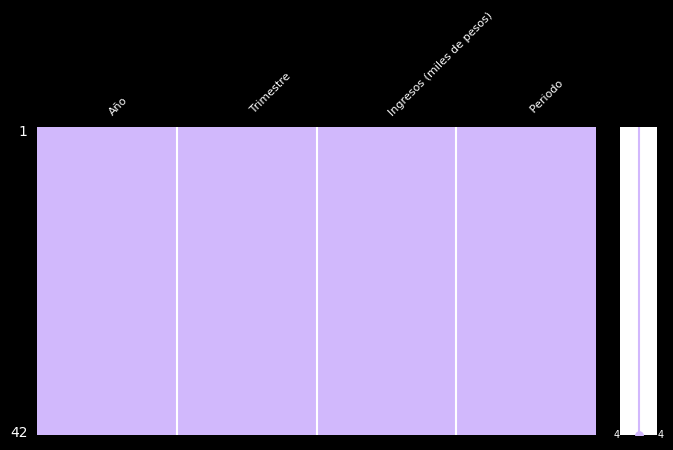

In [1090]:
msno.matrix(ingresos, figsize=(8, 4), color=(0.823, 0.722, 0.992), fontsize=8)

In [1091]:
ingresos[ingresos.duplicated()]
     

,Año,Trimestre,Ingresos (miles de pesos),Periodo


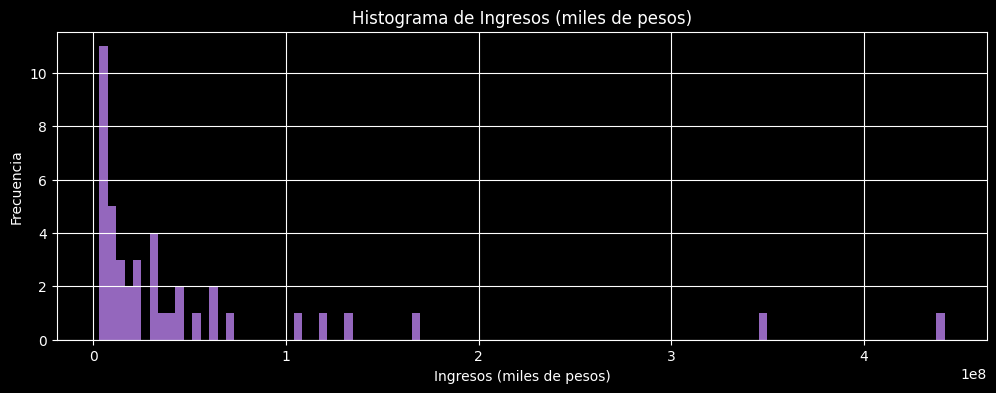

In [1102]:

#Variables numéricas
plt.figure(figsize=(12,4))
ingresos['Ingresos (miles de pesos)'].hist(bins=100,color='tab:purple')
plt.xlabel('Ingresos (miles de pesos)')
plt.ylabel('Frecuencia')
plt.title(f'Histograma de {i}')
plt.show()
     